In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
model=load_iris()
data=model.data
target=model.target
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test=train_test_split(data,target,test_size=0.25,random_state=12)

In [3]:
from sklearn.ensemble import AdaBoostClassifier

In [4]:
clf=AdaBoostClassifier(random_state=12)
clf.fit(feature_train,label_train)
pred=clf.predict(feature_test)

In [5]:
from sklearn.metrics import confusion_matrix#制作混淆矩阵
import matplotlib.pyplot as plt

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 10]], dtype=int64)

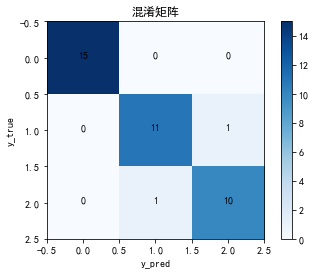

In [6]:
confusion=confusion_matrix(pred,label_test)
plt.imshow(confusion,cmap=plt.cm.Blues)#选择colormap下面的blues色调
plt.colorbar()
plt.title('混淆矩阵')
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False
#接下来在方格上显示数据
#plt.text这个函数
for i in range(confusion.shape[1]):#遍历混淆矩阵的行
    for j in range(confusion.shape[0]):#遍历混淆矩阵的列
        plt.text(i,j,confusion[i,j],horizontalalignment='center',color='black')
plt.ylabel('y_true')
plt.xlabel('y_pred')
confusion

In [6]:
score=clf.score(feature_test,label_test)#准确度
score

0.9473684210526315

In [41]:
from sklearn.metrics import roc_curve
#其中的score是model中decision_function实现的
#该method基本上返回一个Numpy数组，其中每个元素表示分类器对x_test的预测样本是位于超平面的右侧还是左侧，以及离超平面有多远。

roc曲线，auc分数(下面的曲线与X轴的面积除以上面那条曲线与X轴的面积)

(1) fpr, tpr, thresholds  =  roc_curve(y_test, scores) 

      其中y_test为测试集的结果，scores为模型预测的测试集得分（注意：通过decision_function(x_test)计算scores的值）；fpr,tpr,thresholds 分别为假正率、真正率和阈值。（应该是不同阈值下的真正率和假正率）。

(2) roc_auc =auc(fpr, tpr) 

roc_auc为计算的acu的值。


In [ ]:
# y: 样本标签
# scores: 模型对样本属于正例的概率输出
# pos_label: 标记为正例的标签，本例中标记为2的即为正例
#  fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
#  阳性样本正确分类数量占阳性样本总数的比例TPR（即敏感性，Sensitivity），阴性样本正确分类的数量占阴性样本总数的比例FPR